In [10]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load Dataset
df = pd.read_csv(r"E:\PhD\Machine_Learning_A-Z_udemy\Project\Concrete_Strength\concrete_data.csv")

In [12]:
# Define features and target
X = df.drop(columns=["concrete_compressive_strength"])
y = df["concrete_compressive_strength"]

In [13]:
# Split into Train (70%), Validation (20%), Test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

In [14]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=50, random_state=42)
}

In [15]:
# Train and evaluate models
model_results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    end_time = time.time()
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_val, y_pred)
    latency = end_time - start_time

    model_results[name] = {"MSE": mse, "RMSE": rmse, "R² Score": r2, "Latency (s)": latency}

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)

                          MSE       RMSE  R² Score  Latency (s)
Linear Regression  113.443658  10.650993  0.600625     0.003999
Decision Tree       48.655927   6.975380  0.828708     0.010998
Random Forest       26.613475   5.158825  0.906308     0.730969
XGBoost             19.705484   4.439086  0.930627     0.045911


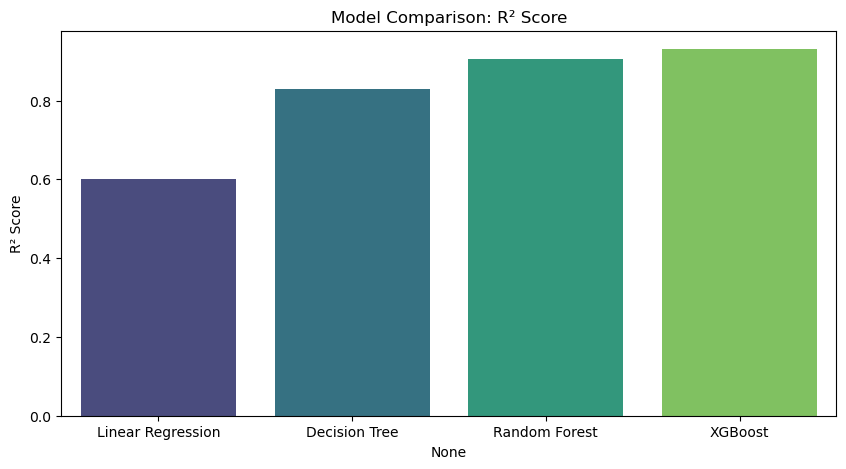

In [16]:
# Visualization of Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")
plt.title("Model Comparison: R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=0)
plt.show()

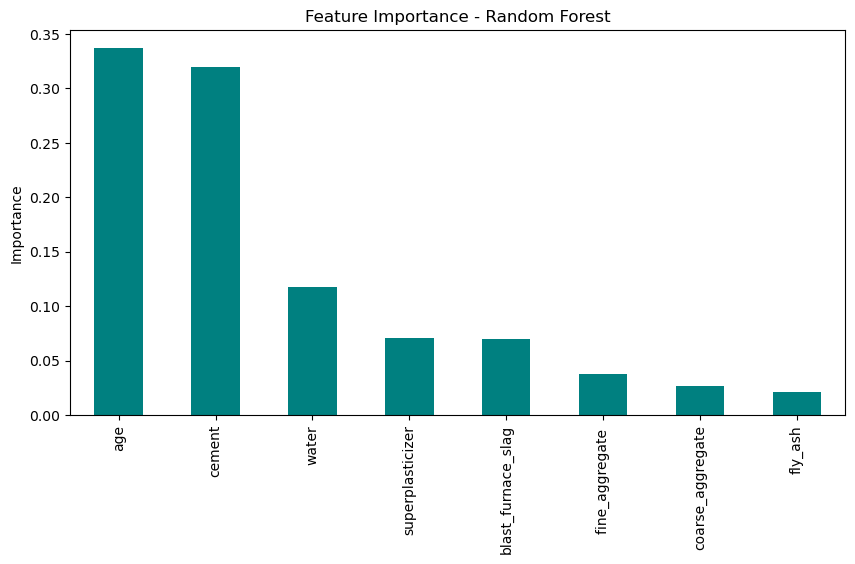

In [17]:
# Feature Importance Plot (For Tree-Based Models)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 5))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()

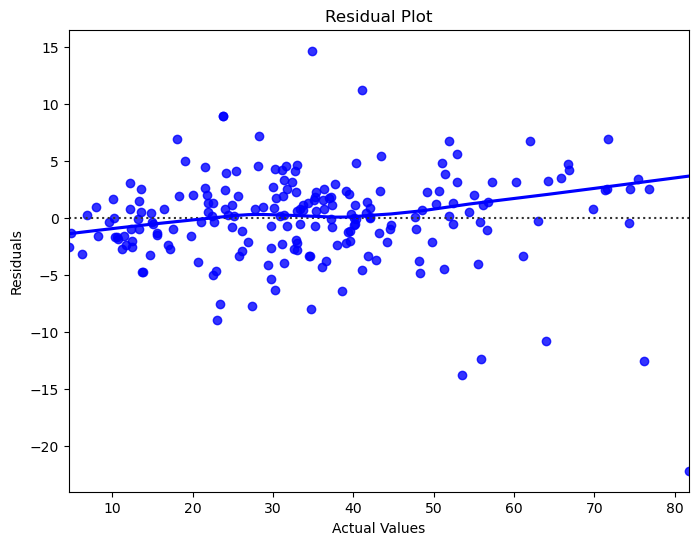

In [18]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_val, y=y_pred, lowess=True, color="blue")
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

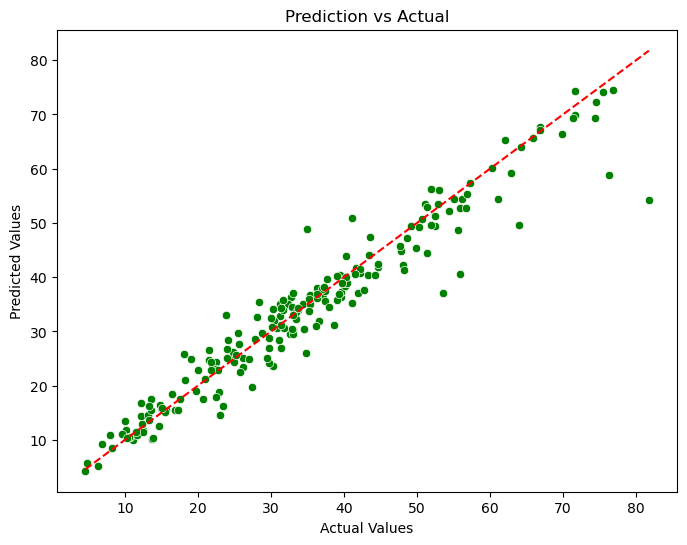

In [19]:
# Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred, color="green")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], "--", color="red")
plt.title("Prediction vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

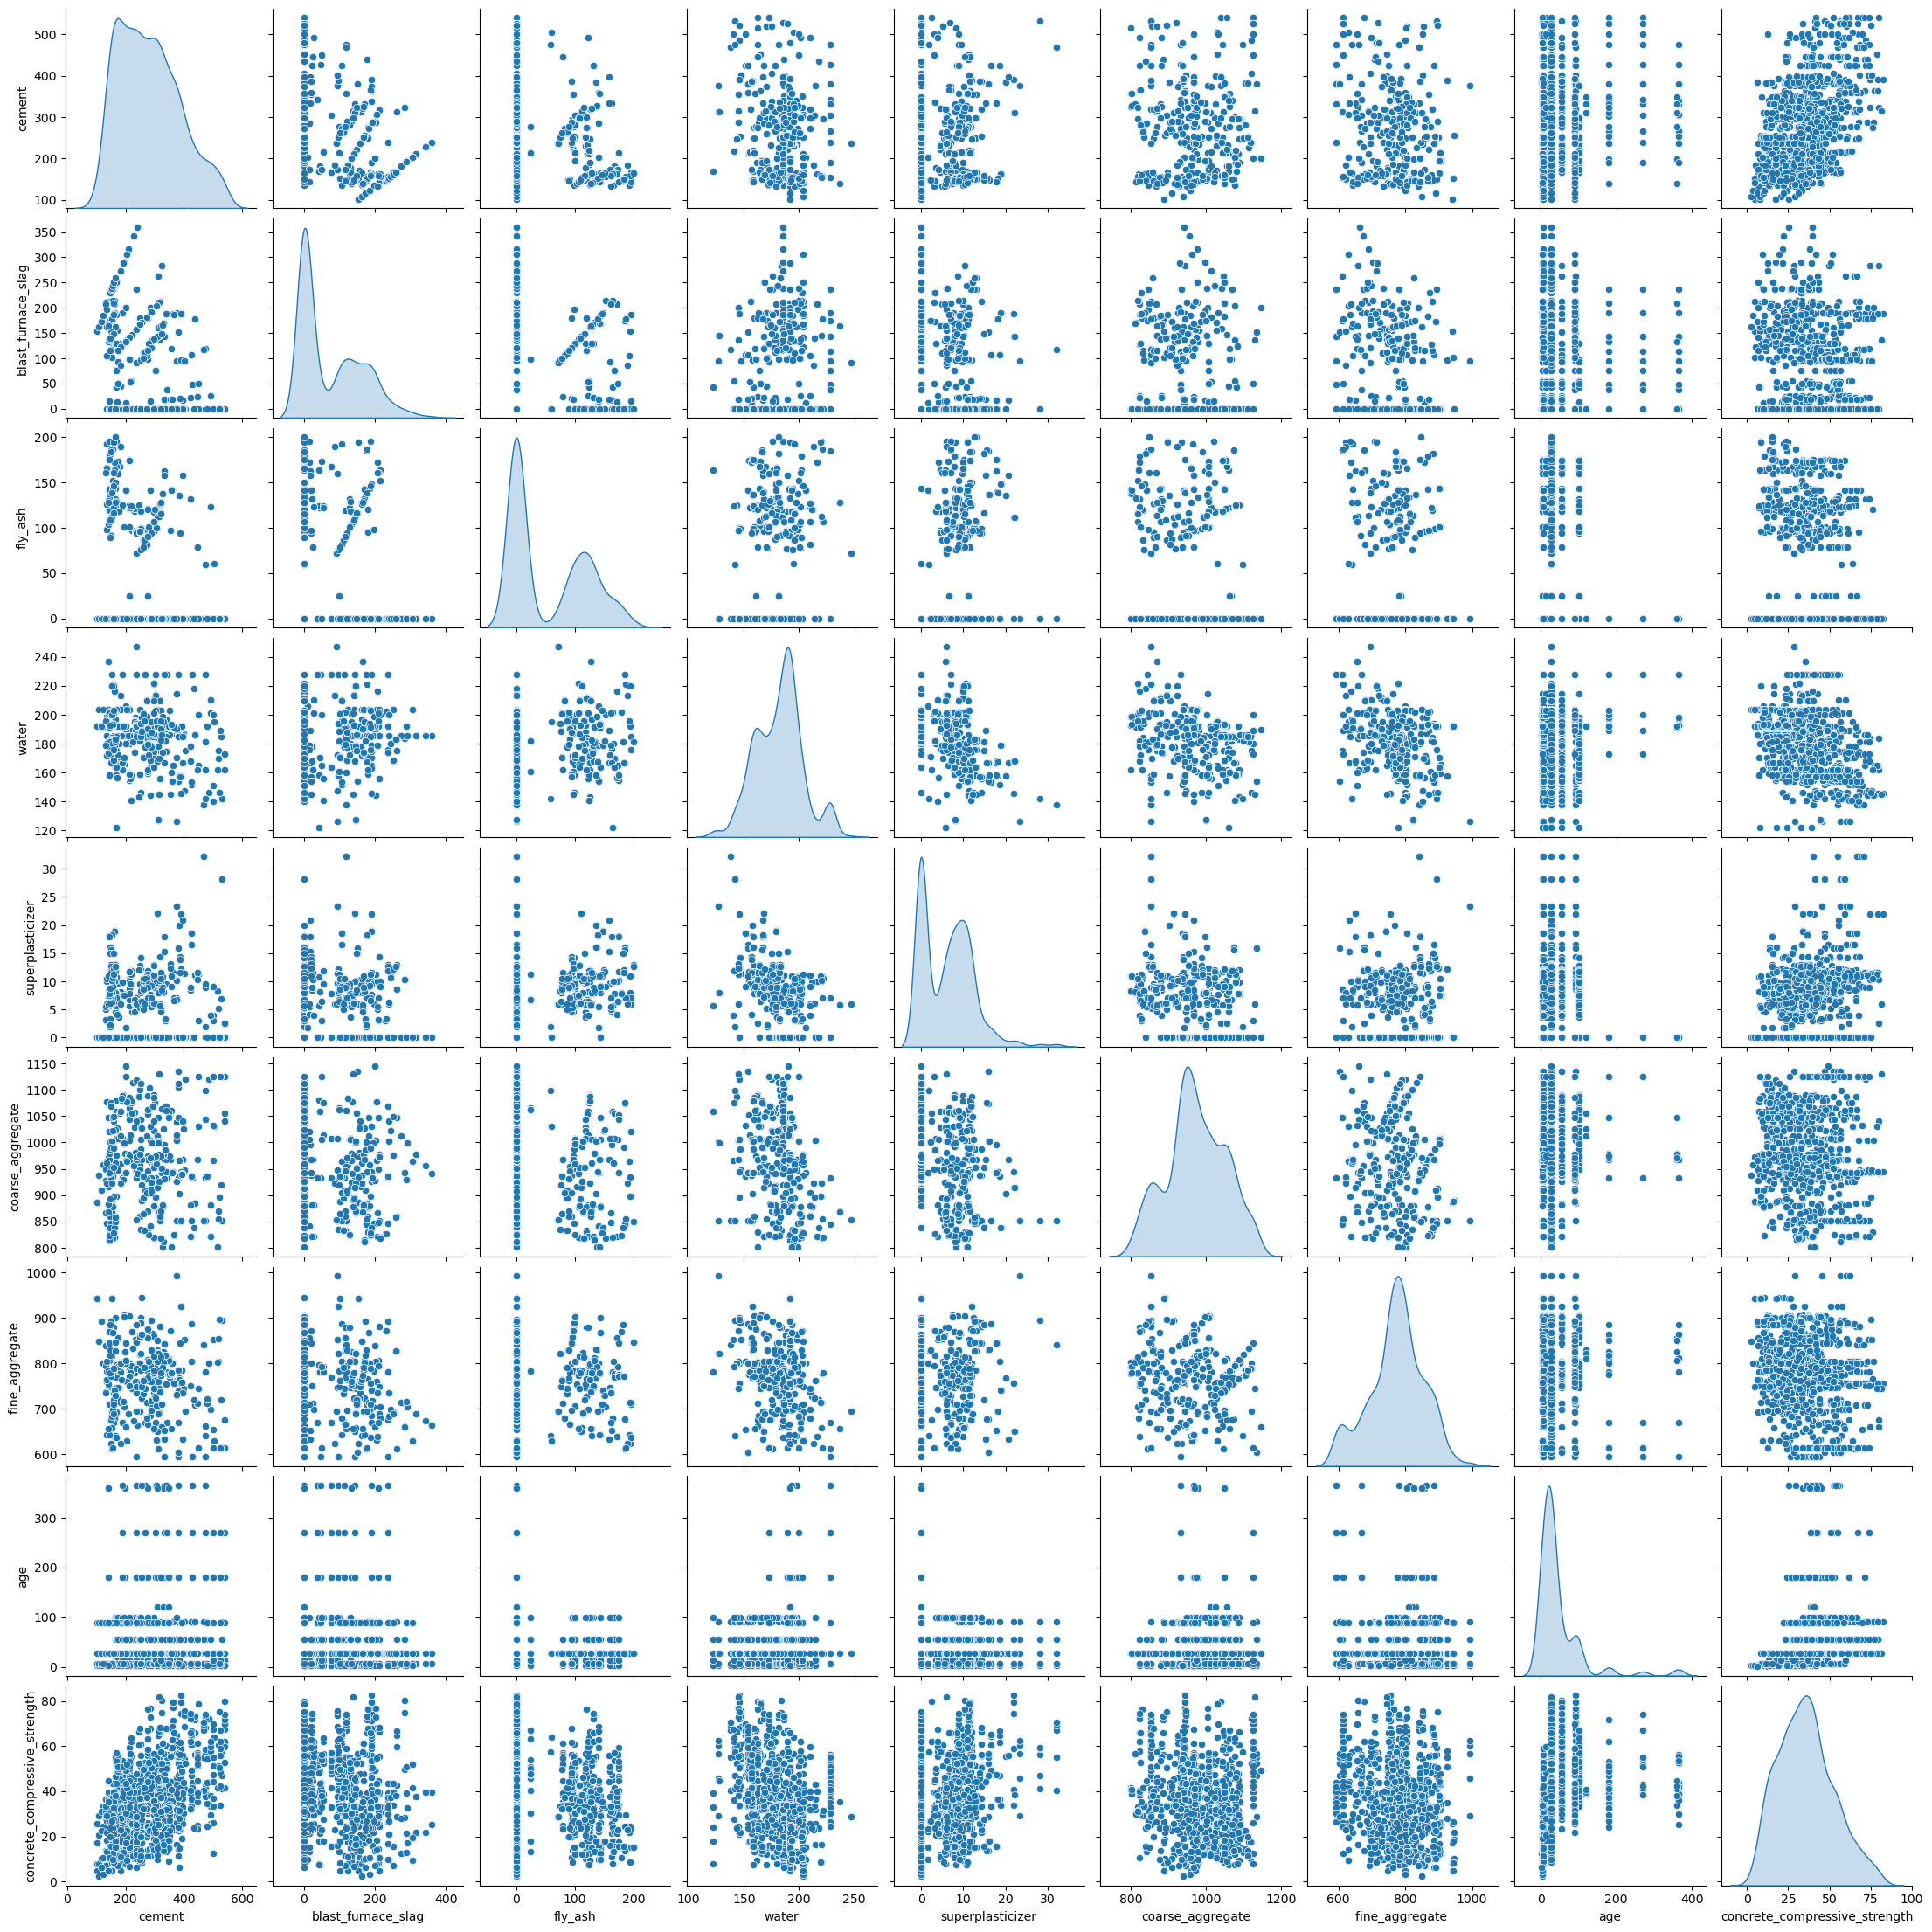

In [20]:
# Pairplot of Features
sns.pairplot(df, diag_kind='kde')
plt.show()

In [21]:
# Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best RF Params:", best_params)
print("Best RF R² Score:", best_score)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best RF Params: {'max_depth': 15, 'n_estimators': 150}
Best RF R² Score: 0.8847256340402937


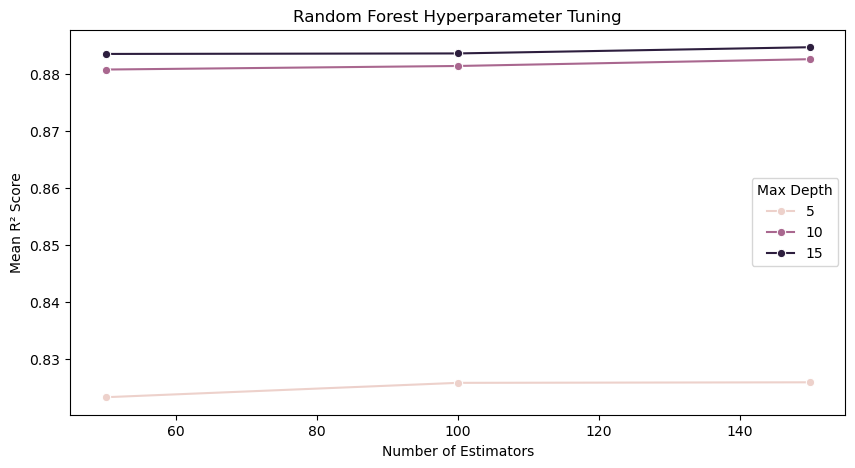

In [22]:
# Visualization of RF Hyperparameter Tuning Results
rf_results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 5))
sns.lineplot(x=rf_results_df["param_n_estimators"], y=rf_results_df["mean_test_score"], hue=rf_results_df["param_max_depth"], marker="o")
plt.title("Random Forest Hyperparameter Tuning")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean R² Score")
plt.legend(title="Max Depth")
plt.show()